Tugas Praktikum ML Lab B1

Pertemuan 1

Nama : Sherli Arninda

NIM : 24060122120028

Nama Dataset : Car Evaluation

Link : https://archive.ics.uci.edu/dataset/19/car+evaluation

1. Eksplorasi dengan Algoritma Decision Tree & Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pd.read_csv(url, names=names)

# Encode fitur kategorikal ke numerik
encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = encoder.fit_transform(dataset[column])

# Split dataset
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluasi Model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, dt_predictions))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, rf_predictions))


Decision Tree Accuracy: 0.9710982658959537
Random Forest Accuracy: 0.9672447013487476

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg 

2. Summary Datase

In [2]:
import pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pandas.read_csv(url, names=names)

In [3]:
print(dataset.shape) #cetak dimensi dataset (baris, kolom)

(1728, 7)


In [4]:
print(dataset.head(20)) #cetak 20 baris pertama

   buying  maint doors persons lug_boot safety  class
0   vhigh  vhigh     2       2    small    low  unacc
1   vhigh  vhigh     2       2    small    med  unacc
2   vhigh  vhigh     2       2    small   high  unacc
3   vhigh  vhigh     2       2      med    low  unacc
4   vhigh  vhigh     2       2      med    med  unacc
5   vhigh  vhigh     2       2      med   high  unacc
6   vhigh  vhigh     2       2      big    low  unacc
7   vhigh  vhigh     2       2      big    med  unacc
8   vhigh  vhigh     2       2      big   high  unacc
9   vhigh  vhigh     2       4    small    low  unacc
10  vhigh  vhigh     2       4    small    med  unacc
11  vhigh  vhigh     2       4    small   high  unacc
12  vhigh  vhigh     2       4      med    low  unacc
13  vhigh  vhigh     2       4      med    med  unacc
14  vhigh  vhigh     2       4      med   high  unacc
15  vhigh  vhigh     2       4      big    low  unacc
16  vhigh  vhigh     2       4      big    med  unacc
17  vhigh  vhigh     2      

In [5]:
print(dataset.groupby('class').size()) #menghitung jumlah elemen (atau baris) dalam dataset untuk setiap kelompok berdasarkan kolom class

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64


In [6]:
print(dataset.describe()) #untuk mendeskripsikan statistik data meliputi count, mean, standard deviasi, nilai min, nilai max, dan quartile

       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


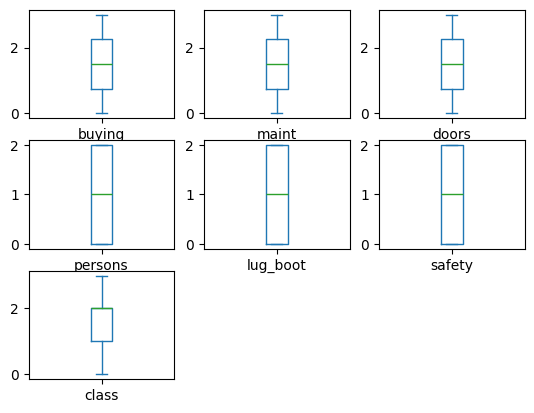

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#mengubah data kategorikal di setiap kolom menjadi nilai numerik.Setiap kolom di dataset di-encode menggunakan objek LabelEncoder.
label_encoders = {}
for col in dataset.columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

dataset.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False) #Membuat plot boxplot untuk setiap kolom di dataset.
plt.show()

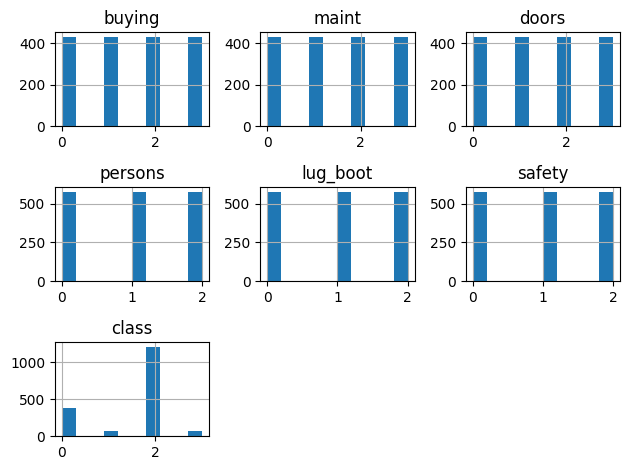

In [13]:
dataset.hist() #membuat histogram masing-masing variabel input untuk melihat persebaran data
plt.tight_layout()
plt.show()

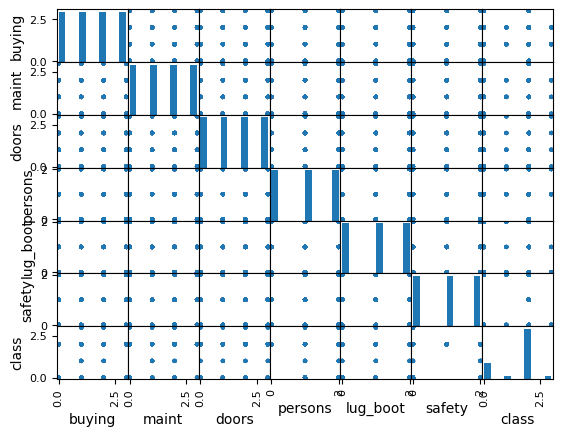

In [16]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset) # melihat scatterplots dari semua pasang atribut yang membantu melihat hubungan antar variabel.
plt.show()


Evaluasi Algoritma (KNN, NB, SVM)

In [19]:
import pandas as pd
from sklearn import model_selection
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pandas.read_csv(url, names=names)

In [20]:
# membagi dataset menjadi data pelatihan (training set) dan data validasi (validation set)
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [21]:
seed = 7 #Menetapkan random seed untuk memastikan proses yang melibatkan angka acak dapat direproduksi.
scoring = 'accuracy' #menentukan bahwa kinerja model akan diukur menggunakan akurasi, yang cocok untuk masalah klasifikasi jika data memiliki distribusi kelas yang seimbang.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(dataset)

# memisahkan dataset menjadi fitur (features) dan label (target)
X = df.drop('class', axis=1)
y = df['class']

# mengubah data target (y) dari bentuk kategorikal menjadi bentuk numerik menggunakan LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# mengubah setiap kolom dalam X menjadi format numerik menggunakan LabelEncoder.
X = X.apply(LabelEncoder().fit_transform)

# membagi dataset menjadi dua bagian: data pelatihan (training set) dan data pengujian (test set).
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define models
models = [
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Kode ini melakukan k-fold cross-validation untuk mengevaluasi beberapa model dengan menggunakan metrik akurasi.
# Setiap model diuji menggunakan 10 lipatan (folds), dan hasilnya berupa rata-rata akurasi dan standar deviasi dari setiap lipatan yang dicetak
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

KNN: 0.9060 (0.0315)
NB: 0.6223 (0.0245)
SVM: 0.9067 (0.0242)


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# membagi dataset menjadi dua bagian: data pelatihan (training set) dan data pengujian (test set).
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=7)

# Kode ini melatih model Support Vector Machine (SVM) menggunakan data pelatihan X_train dan Y_train.
# Setelah menjalankan svm.fit(), model SVM siap digunakan untuk melakukan prediksi pada data baru atau data uji.
svm = SVC()
svm.fit(X_train, Y_train)

# Membuat predictions
predictions = svm.predict(X_validation)

# Menampilkan hasil, berupa accuracy score, confusion matrix, dan classification report
print("Accuracy Score:", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))


Accuracy Score: 0.953757225433526

Confusion Matrix:
[[ 70   0   7   0]
 [  4   2   0   2]
 [  1   0 245   0]
 [  2   0   0  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        77
           1       1.00      0.25      0.40         8
           2       0.97      1.00      0.98       246
           3       0.87      0.87      0.87        15

    accuracy                           0.95       346
   macro avg       0.94      0.76      0.79       346
weighted avg       0.95      0.95      0.95       346



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
dataset = pd.read_csv(url, names=names)

# Encode fitur yang kategorikal menjadi numerik
label_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# memisahkan fitur (X) dan label (Y) dari dataset
# Hasilnya adalah variabel X yang berisi fitur dan Y yang berisi target yang akan digunakan dalam pelatihan model machine learning.
X = dataset.drop('class', axis=1)
Y = dataset['class']

# membagi dataset menjadi data pelatihan dan data validasi
# Hasilnya yaitu X_train dan Y_train:
# Data pelatihan untuk melatih model.
# X_validation dan Y_validation: Data validasi untuk mengevaluasi kinerja model setelah pelatihan.
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7)

# Define the models to evaluate
models = [
    ('KNN', KNeighborsClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('LR', LogisticRegression(max_iter=200)),
    ('DT', DecisionTreeClassifier())
]

# melakukan k-fold cross-validation pada beberapa model klasifikasi dan menampilkan hasil evaluasi akurasi dari masing-masing model.
# Hasil dari kode tersebut akan memberikan output berupa akurasi rata-rata dan standar deviasi untuk setiap model yang diuji dengan menggunakan k-fold cross-validation.
results = []
names = []
scoring = 'accuracy'

print("Cross-Validation Results:")
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# kode ini melatih beberapa model klasifikasi menggunakan data pelatihan, kemudian mengevaluasi kinerjanya dengan menggunakan data validasi, mencetak hasil akurasi, matriks kebingungannya, dan laporan klasifikasi.
# Laporan ini mencakup metrik seperti precision, recall, dan F1-score untuk memberikan gambaran menyeluruh tentang kemampuan model dalam mengklasifikasikan data.
print("\nDetailed Evaluation on Validation Data:")
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(Y_validation, predictions))
    print("Confusion Matrix:\n", confusion_matrix(Y_validation, predictions))

    # menghasilkan laporan metrik evaluasi klasifikasi (precision, recall, f1-score) untuk masing-masing kelas, dengan opsi untuk menangani pembagian dengan nol menggunakan parameter zero_division.
    print("Classification Report:\n", classification_report(Y_validation, predictions, zero_division=1))


Cross-Validation Results:
KNN: 0.9060 (0.0315)
NB: 0.6223 (0.0245)
SVM: 0.9067 (0.0242)
LR: 0.6816 (0.0344)
DT: 0.9689 (0.0164)

Detailed Evaluation on Validation Data:

KNN Evaluation:
Accuracy: 0.9132947976878613
Confusion Matrix:
 [[ 59   0  18   0]
 [  1   6   1   0]
 [  3   1 242   0]
 [  3   1   2   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        77
           1       0.75      0.75      0.75         8
           2       0.92      0.98      0.95       246
           3       1.00      0.60      0.75        15

    accuracy                           0.91       346
   macro avg       0.89      0.77      0.82       346
weighted avg       0.91      0.91      0.91       346


NB Evaluation:
Accuracy: 0.6098265895953757
Confusion Matrix:
 [[  6   0  25  46]
 [  1   0   1   6]
 [  1   0 190  55]
 [  0   0   0  15]]
Classification Report:
               precision    recall  f1-score   support

          